To be run on perlmutter

In [1]:
import os
import sys
sys.path.insert(0, "/global/cfs/cdirs/m4129/projects/crispy_shifty_adam")

In [ ]:
from crispy_shifty.utils.io import fix_path_prefixes

pairs = '/global/u2/b/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/04_two_state/mpnn_paired_states.pair'
new_pairs = fix_path_prefixes(
    find="/home",
    replace="/global/u2/b",
    file=pairs,
    overwrite=True,
)

In [ ]:
from crispy_shifty.utils.io import gen_array_tasks

simulation_name = "05_fold_Y"
design_list_file = '/global/u2/b/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/04_two_state/mpnn_paired_states.pair'
output_path = f"/pscratch/sd/b/broerman/{simulation_name}"

options = " ".join(
    [
        "out:level 200",
    ]
)
extra_kwargs = {"models": "all"}

gen_array_tasks(
    distribute_func="crispy_shifty.protocols.folding.fold_dimer_Y",
    design_list_file=design_list_file,
    output_path=output_path,
    perlmutter_mode=True,
    nstruct=1,
    nstruct_per_task=1,
    options=options,
    extra_kwargs=extra_kwargs,
    simulation_name=simulation_name,
    time="45:00",
)

/global/cfs/cdirs/m4129/projects/crispy_shifty_adam/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


Run the following command with your desired environment active:
sbatch -a 1-216 /pscratch/sd/b/broerman/03_fold_dimer_Y/run.sh


In [ ]:
import socket
print(f"ssh {socket.gethostname()}")

ssh nid002397


In [2]:
print("""module load cudatoolkit/11.4
N=0
N2=$(( N + 1 ))
start_idx=$(( N*4 + 1 ))
end_idx=$(( N2*4 ))
source activate /global/cfs/cdirs/m4129/projects/crispy_shifty_adam/envs/crispy
time head -n $end_idx /pscratch/sd/b/broerman/05_fold_Y/tasks.cmds | tail -n +$start_idx | parallel 'CUDA_VISIBLE_DEVICES=$(("{%}" - 1)) && bash -c {}'""")

module load cudatoolkit/11.4
N=0
N2=$(( N + 1 ))
start_idx=$(( N*4 + 1 ))
end_idx=$(( N2*4 ))
source activate /global/cfs/cdirs/m4129/projects/crispy_shifty_adam/envs/crispy
time head -n $end_idx /pscratch/sd/b/broerman/05_fold_Y/tasks.cmds | tail -n +$start_idx | parallel 'CUDA_VISIBLE_DEVICES=$(("{%}" - 1)) && bash -c {}'


Run the first 100 to get 22000 folded sequences. This will include both rosetta one-state and mpnn two-state with varying betas. Analyze these structures, choose the best beta value (if any) and whether to include rosetta moving forward, then fold the rest.

13, 16, 26, 36, 38, 39, 40, 42, 46, 51, 58, 60, 63, 68, 69, 73, 78, 80, 82, 89, 98 all timed out. This is fine, we're just gonna refold everything anyways.

To run on the digs

### Collect scorefiles of the folded paired state Ys and concatenate

In [1]:
# collect score files of the folded paired state Ys
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.utils.io import collect_score_file

simulation_name = "05_fold_Y_sample"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/{simulation_name}"

if not os.path.exists(os.path.join(output_path, "scores.json")):
    collect_score_file(output_path, "scores")

/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


### Load resulting concatenated scorefile
TODO might have to switch to a dask accelerated approach for production

In [2]:
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.utils.io import parse_scorefile_linear

if not os.path.exists(os.path.join(output_path, "scores.csv")):
    scores_df = parse_scorefile_linear(os.path.join(output_path, "scores.json"))

100%|██████████| 20735/20735 [01:57<00:00, 176.85it/s]


### Dump scores_df as a CSV and then reload, for performance reasons

In [3]:
import pandas as pd

if not os.path.exists(os.path.join(output_path, "scores.csv")):
    scores_df.to_csv(os.path.join(output_path, "scores.csv"))

In [4]:
import pandas as pd
import os
simulation_name = "05_fold_Y_sample"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/{simulation_name}"
scores_df = pd.read_csv(os.path.join(output_path, "scores.csv"), index_col="Unnamed: 0")

from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
    # 'display.max_rows', None,
):
    display(scores_df)

,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_pTMscore,Y_recycles,Y_rmsd_to_reference,Y_seed,Y_tol,Y_type,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,designed_by,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dslf_fa13,dssp_A,dssp_B,elapsed_time,fa_atr,fa_dun,fa_dun_dev,fa_dun_rot,fa_dun_semi,fa_elec,fa_intra_atr_xover4,fa_intra_elec,fa_intra_rep,fa_intra_rep_xover4,fa_intra_sol_xover4,fa_rep,fa_sol,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,hxl_tors,lk_ball,lk_ball_bridge,lk_ball_bridge_uncpl,lk_ball_iso,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,mpnn_msd_betas,mpnn_msd_design_area,mpnn_msd_temperature,new_loop_resis_A,new_loop_resis_B,omega,p_aa_pp,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,pro_close,rama_prepro,ref,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,shift_A,shift_B,ss_sc,total_length_A,total_length_B,total_score,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity,remodel_after_loop_A,remodel_after_loop_B,remodel_before_loop_A,remodel_before_loop_B
/pscratch/sd/b/broerman/05_fold_Y/decoys/0000/05_fold_Y_2912168aeb6e439b8266beb79f0f30d1.pdb.bz2,16.203054,29.171677,29.226545,29.116808,3.199472,3.420361,2.978582,93.670998,4,0.478022,3.0,20.917648,0,2.689890,monomer_ptm,XAAAAAAAAAAAAAAABABAAAAAAAAAAAAAAAABAAAAAAAAAA...,XAAAAAAAAAAAAAAABABAAAAAAAAAAAAAAAABAAAAAAAAAA...,233.111328,46.213089,46.213089,loop_match,loop_match,10.536095,190.801361,278.631042,298.032715,mpnn,11.0,7.0,14.0,0.0,LHHHHHHHHHHHHHHHLLLHHHHHHHHHHHHHHHHLHHHHHHHHHH...,LHHHHHHHHHHHHHHHLLLHHHHHHHHHHHHHHHHLHHHHHHHHHH...,9.025812,-3595.044917,1318.200352,63.599736,233.694214,353.608932,-1088.798104,-101.844960,-59.658559,1168.337694,84.139584,142.260213,8037.411022,2658.746184,-56.622838,0.000000,-35.123728,-453.959210,22.793245,937.195273,5.996982,44.123446,2142.260729,-64.009795,12.519507,9.551972,0.775416,0.734010,"0.5,0.5",full,0.2,"70,71,72","70,71,72",104.679957,-120.032560,X16_3_13_4_ct0_fe,144.0,8.013067,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4.0,5.0,4.0,1.560240,-276.877114,-110.88126,0.691667,0.810951,0.691384,0.748721,-850.461548,-156.840118,-621.606384,-620.090393,-395.446564,-184.883591,-366.556061,-177.461121,-170.467133,-3.015821,1.0,-5.0,0.724976,144.0,144.0,2592.932589,0.350249,0.382868,0.275359,0.363528,0.382879,0.733649,0.136726,0.000000e+00,NaN,NaN,NaN,NaN
/pscratch/sd/b/broerman/05_fold_Y/decoys/0000/05_fold_Y_c0c0c444aaea4ce1acb78855ec07f6af.pdb.bz2,15.274196,27.388128,27.720848,27.055408,3.109997,3.259141,2.960854,94.152344,5,0.513716,3.0,18.415222,0,2.626367,monomer_ptm,XAAAAAAAAAAAAAAAAAABAABAAAAAAAAAAAAAAAAAAABAAB...,XAAAAAAAAAAAAAAAAAABAABAAAAAAAAAAAAAAAAAAABAAB...,129.954163,51.600029,51.600029,loop_match,loop_match,-1.000000,465.042114,654.593384,801.777344,mpnn,26.0,32.0,12.0,0.0,LHHHHHHHHHHHHHHHHHHLLLLHHHHHHHHHHHHHHHHHHHLLLL...,LHHHHHHHHHHHHHHHHHHLLLLHHHHHHHHHHHHHHHHHHHLLLL...,13.848165,-4363.742819,1314.850168,53.754463,291.362492,400.851598,-1186.627572,-134.794232,-92.355413,1424.840987,136.020895,141.994106,4151.220273,2845.006780,-51.259917,0.000000,-32.443128,-596.019215,24.696926,1104.128484,4.922037,30.144874,2644.821180,-96.576410,12.220197,8.954142,0.753036,0.721806,"0.5,0.5",full,0.2,"89,90,91,92","89,90,91,92",146.808576,-169.243233,X19_4_19_4_ct5_fa,184.0,12.282542,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4.0,5.0,4.0,36.037050,-261.600618,59.82890,-1.000000,0.732786,0.745360,0.788725,-1131.244507,-198.669647,-783.610596,-810.276917,-462.643005,-206.668091,-419.295654,-212.627563,-204.684937,-3.142346,6.0,1.0,0.735113,184.0,184.0,-184.645277,0.303139,0.339117,0.345621,0.372976,0.571151,0.570243,0.120987,4.453714e-07,NaN,NaN,NaN,Na

### Data exploration
Gonna remove the Rosetta sfxn scoreterms for now

In [21]:
rosetta = scores_df[scores_df["designed_by"] == "rosetta"]#.sample(1000, random_state=0)
mpnn = scores_df[scores_df["designed_by"] == "mpnn"]#.sample(1000, random_state=0)
sample_df = pd.concat([rosetta, mpnn])

# sample_df = scores_df.sample(2000, random_state=0)

### Remove score terms we don't care about

In [22]:
import sys
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.protocols.design import beta_nov16_terms

sample_df = sample_df[
    [term for term in sample_df.columns if term not in beta_nov16_terms]
]
print(len(sample_df))
print(list(sample_df.columns))

20735
['Y_mean_pae', 'Y_mean_pae_interaction', 'Y_mean_pae_interaction_AB', 'Y_mean_pae_interaction_BA', 'Y_mean_pae_intra_chain', 'Y_mean_pae_intra_chain_A', 'Y_mean_pae_intra_chain_B', 'Y_mean_plddt', 'Y_model', 'Y_pTMscore', 'Y_recycles', 'Y_rmsd_to_reference', 'Y_seed', 'Y_tol', 'Y_type', 'abego_str_A', 'abego_str_B', 'bb_clash', 'bb_clash_A', 'bb_clash_B', 'closure_type_A', 'closure_type_B', 'cms_ac_bn', 'cms_dhr', 'cms_dhr_ac', 'cms_dhr_bn', 'designed_by', 'dhr_ac_int_count', 'dhr_bn_int_count', 'dhr_int_count', 'dssp_A', 'dssp_B', 'elapsed_time', 'loop_dist_A', 'loop_dist_B', 'loop_sc_A', 'loop_sc_B', 'mpnn_msd_betas', 'mpnn_msd_design_area', 'mpnn_msd_temperature', 'new_loop_resis_A', 'new_loop_resis_B', 'parent', 'parent_length', 'parent_loop_dist', 'parent_path', 'pivot_helix_A', 'pivot_helix_B', 'pre_break_helix', 'sc_ac_bn', 'sc_dhr', 'sc_dhr_ac', 'sc_dhr_bn', 'score', 'score_1', 'score_124', 'score_134', 'score_14', 'score_2', 'score_23', 'score_3', 'score_4', 'score_per_r

### Plot AF2 metrics

5it [00:00, 11.05it/s]


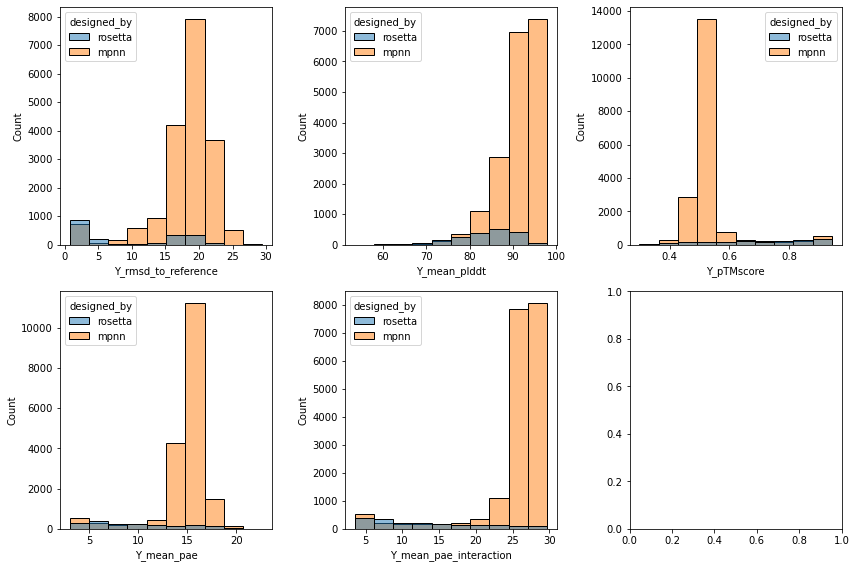

In [23]:
import matplotlib.pyplot as plt
from crispy_shifty.utils.plotting import histplot_df, pairplot_df

cols = [
    "Y_rmsd_to_reference",
    "Y_mean_plddt",
    "Y_pTMscore",
    "Y_mean_pae",
    "Y_mean_pae_interaction",
]
the_fig = histplot_df(
    df=sample_df,
    cols=cols,
    bins=10,
    hue="designed_by",
)
# plt.savefig(os.path.join(output_path, "old_vs_new_af2_scores.png"))

<Figure size 1440x1440 with 0 Axes>

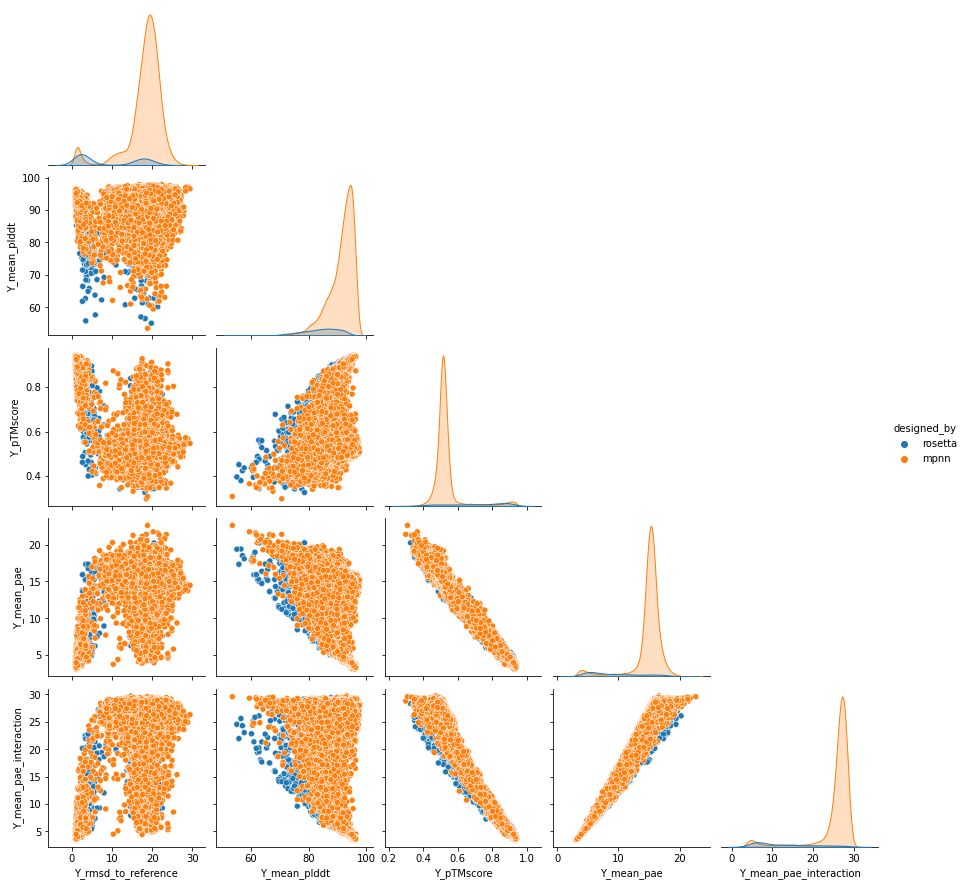

In [24]:
the_fig = pairplot_df(
    df=sample_df,
    cols=cols,
    hue="designed_by",
)
# plt.savefig(os.path.join(output_path, "old_vs_new_af2_scores_paired.png"))

In [25]:
sample_df['msd_Y_beta'] = sample_df['mpnn_msd_betas'].str.split(',').str[1].astype(float)
sample_df[['mpnn_msd_betas', 'msd_Y_beta']]

,mpnn_msd_betas,msd_Y_beta
/pscratch/sd/b/broerman/05_fold_Y/decoys/0000/05_fold_Y_cd7e8f657bea4cf19eade6d9a3a747b3.pdb.bz2,"0.3,0.7",0.7
/pscratch/sd/b/broerman/05_fold_Y/decoys/0000/05_fold_Y_f7ec6823a3084647a8e1711ead21fb8a.pdb.bz2,"0.3,0.7",0.7
/pscratch/sd/b/broerman/05_fold_Y/decoys/0000/05_fold_Y_cae0dbd4ca934899b4934ad3ab9625f1.pdb.bz2,"0.4,0.6",0.6
/pscratch/sd/b/broerman/05_fold_Y/decoys/0000/05_fold_Y_c2610829b62442b3b450ff671c03a4d5.pdb.bz2,"0.4,0.6",0.6
/pscratch/sd/b/broerman/05_fold_Y/decoys/0000/05_fold_Y_14b3b6b8a9d4481ea993070e37328d82.pdb.bz2,"0.5,0.5",0.5
...,...,...
/pscratch/sd/b/broerman/05_fold_Y/decoys/0008/05_fold_Y_f69d2240b2d94f73a100b44a7c7477e2.pdb.bz2,"0.5,0.5",0.5
/pscratch/sd/b/broerman/05_fold_Y/decoys/0008/05_fold_Y_becc29b2509c43d78efc17ecaf257c67.pdb.bz2,"0.4,0.6",0.6
/pscratch/sd/b/broerman/05_fold_Y/decoys/0008/05_fold_Y_6a3769c59c8d46c98a183fa2b4d52a7d.pdb.bz2,"0.5,0.5",0.5
/pscratch/sd/b/broerman/05_fold_Y/decoys/0008/05_fold_Y_f64a9a42e81d49d29d53cf7b285b968d.pdb.bz2,"0.4,0.6",0.6


### Plot effects of MPNN beta distribution on AF2 metrics

6it [00:00,  9.50it/s]


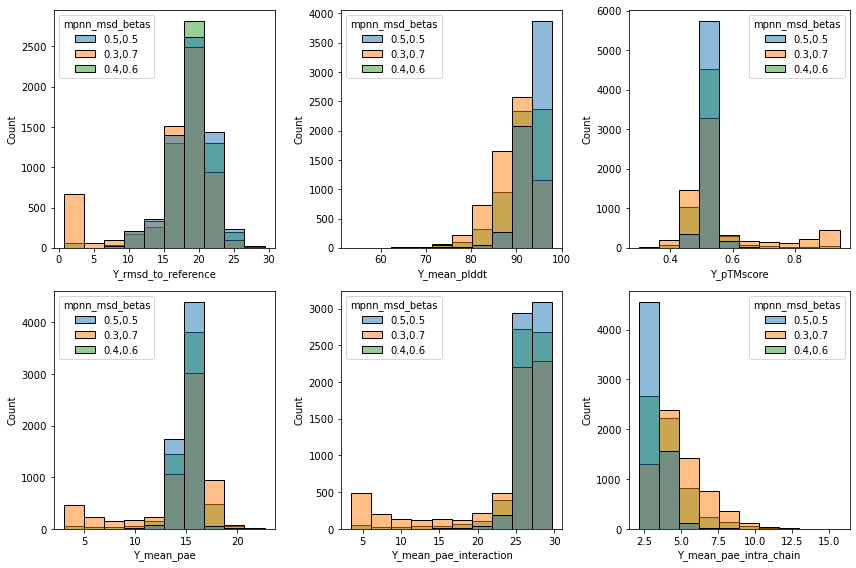

In [26]:
cols = [
    "Y_rmsd_to_reference",
    "Y_mean_plddt",
    "Y_pTMscore",
    "Y_mean_pae",
    "Y_mean_pae_interaction",
    "Y_mean_pae_intra_chain",
]
the_fig = histplot_df(
    df=mpnn,
    cols=cols,
    bins=10,
    hue="mpnn_msd_betas",
)
# plt.savefig(os.path.join(output_path, "old_vs_new_af2_scores_area.png"))

<Figure size 1440x1440 with 0 Axes>

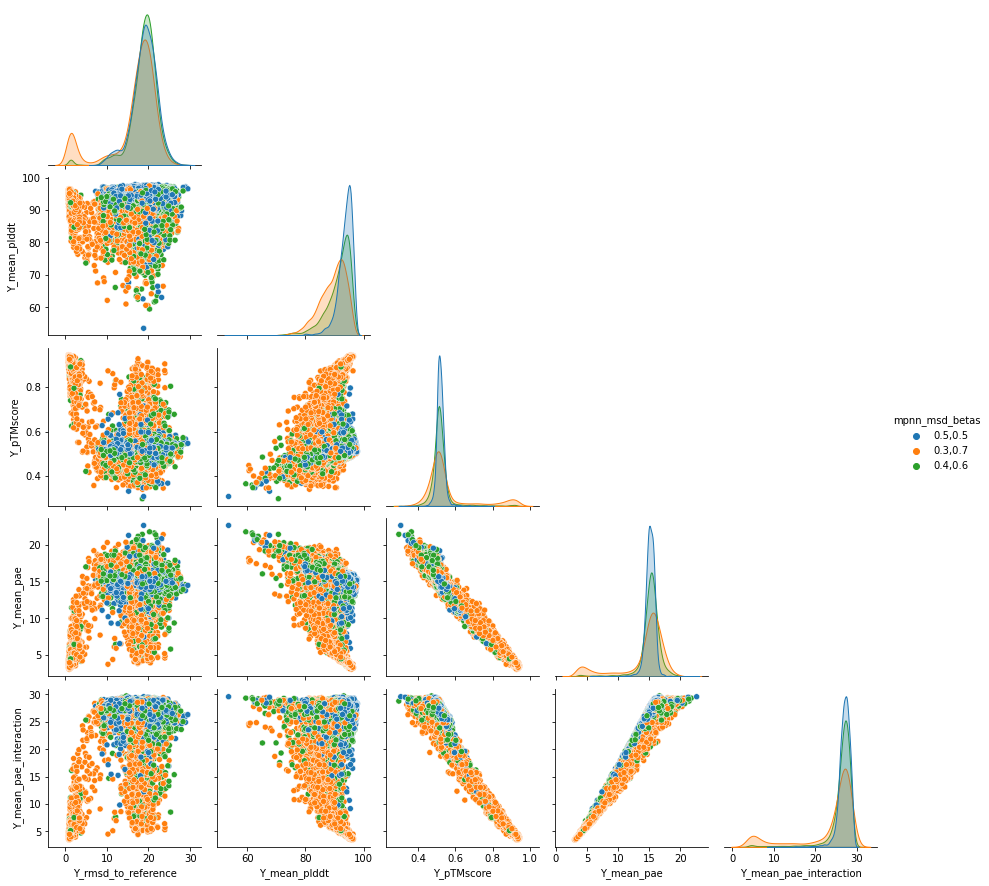

In [27]:
cols = [
    "Y_rmsd_to_reference",
    "Y_mean_plddt",
    "Y_pTMscore",
    "Y_mean_pae",
    "Y_mean_pae_interaction",
]
the_fig = pairplot_df(
    df=mpnn,
    cols=cols,
    hue="mpnn_msd_betas",
)
# plt.savefig(os.path.join(output_path, "old_vs_new_af2_scores_paired.png"))

The 50/50 beta split very rarely resulted in folded dimers. So, for the full folding, only fold sequences from 40/60 or 30/70 distributions. Go back to 04_two_state and generate a paired list of only these distributions.

To be run on perlmutter

In [3]:
import os
import sys
sys.path.insert(0, "/global/cfs/cdirs/m4129/projects/crispy_shifty_adam")

In [5]:
from crispy_shifty.utils.io import fix_path_prefixes

pairs = '/global/u2/b/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/04_two_state/mpnn_paired_states_filtered.pair'
new_pairs = fix_path_prefixes(
    find="/home",
    replace="/global/u2/b",
    file=pairs,
    overwrite=True,
)

In [6]:
from crispy_shifty.utils.io import gen_array_tasks

simulation_name = "05_fold_Y"
design_list_file = '/global/u2/b/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/04_two_state/mpnn_paired_states_filtered.pair'
output_path = f"/pscratch/sd/b/broerman/{simulation_name}"

options = " ".join(
    [
        "out:level 200",
    ]
)
extra_kwargs = {"models": "all"}

gen_array_tasks(
    distribute_func="crispy_shifty.protocols.folding.fold_dimer_Y",
    design_list_file=design_list_file,
    output_path=output_path,
    perlmutter_mode=True,
    nstruct=1,
    nstruct_per_task=1,
    options=options,
    extra_kwargs=extra_kwargs,
    simulation_name=simulation_name,
    time="59:00",
)

Run the following command with your desired environment active:
sbatch -a 1-2558 /pscratch/sd/b/broerman/05_fold_Y/run.sh


Some jobs on perlmutter timed out. I probably shouldn't have tried to fold 10 sequences, all 5 models, at once in one hour. I think what happens is the jobs on that node which did finish will successfully output, while those which timed out will not output anything. So I can just check which protein inputs are not present in the output set, then fold all of those on the digs. Should be a much smaller fraction than what I'm folding on perlmutter.

To run on the digs

### Collect scorefiles of the folded paired state Ys and concatenate

In [1]:
# collect score files of the folded paired state Ys
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.utils.io import collect_score_file

simulation_name = "05_fold_Y"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/{simulation_name}"

if not os.path.exists(os.path.join(output_path, "scores.json")):
    collect_score_file(output_path, "scores")

/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


### Load resulting concatenated scorefile
TODO might have to switch to a dask accelerated approach for production

In [1]:
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.utils.io import parse_scorefile_linear

simulation_name = "05_fold_Y"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/{simulation_name}"

if not os.path.exists(os.path.join(output_path, "scores.csv")):
    scores_df = parse_scorefile_linear(os.path.join(output_path, "scores.json"))

/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


  0%|          | 0/507650 [00:00<?, ?it/s]

### Dump scores_df as a CSV and then reload, for performance reasons

In [2]:
import pandas as pd

if not os.path.exists(os.path.join(output_path, "scores.csv")):
    scores_df.to_csv(os.path.join(output_path, "scores.csv"))

In [3]:
import pandas as pd
import os
simulation_name = "05_fold_Y"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/{simulation_name}"
scores_df = pd.read_csv(os.path.join(output_path, "scores.csv"), index_col="Unnamed: 0")

from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
    # 'display.max_rows', None,
):
    display(scores_df)

,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_pTMscore,Y_recycles,Y_rmsd_to_reference,Y_seed,Y_tol,Y_type,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,designed_by,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dslf_fa13,dssp_A,dssp_B,elapsed_time,fa_atr,fa_dun,fa_dun_dev,fa_dun_rot,fa_dun_semi,fa_elec,fa_intra_atr_xover4,fa_intra_elec,fa_intra_rep,fa_intra_rep_xover4,fa_intra_sol_xover4,fa_rep,fa_sol,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,hxl_tors,lk_ball,lk_ball_bridge,lk_ball_bridge_uncpl,lk_ball_iso,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,mpnn_msd_betas,mpnn_msd_design_area,mpnn_msd_temperature,new_loop_resis_A,new_loop_resis_B,omega,p_aa_pp,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,pro_close,rama_prepro,ref,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,shift_A,shift_B,ss_sc,total_length_A,total_length_B,total_score,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity,remodel_after_loop_B,remodel_before_loop_B,remodel_after_loop_A,remodel_before_loop_A
/pscratch/sd/b/broerman/05_fold_Y/decoys/0026/05_fold_Y_b97331e733e541dcb987c6aa6fa13e51.pdb.bz2,13.678399,21.911774,20.987543,22.836002,5.395913,3.328466,7.463359,86.040703,5,0.545694,3.0,16.337996,0,2.202384,monomer_ptm,XAAAAAAAAAAAAAGBBAAAAAAAAAAAAAAGBBAAAAAAAAAAAA...,XAAAAAAAAAAAAAGBBAAAAAAAAAAAAAAGBBAAAAAAAAAAAA...,4200.174805,893.572571,312.426392,loop_match,loop_match,-1.0,413.335999,445.917084,526.299500,mpnn,29.0,33.0,16.0,0.0,LHHHHHHHHHHHHHLLLHHHHHHHHHHHHHHLLLHHHHHHHHHHHH...,LHHHHHHHHHHHHLLLLHHHHHHHHHHHHHHLLLHHHHHHHHHHHH...,8.256180,-3131.210452,967.926098,46.111216,218.464225,288.704422,-862.162222,-99.335453,-48.959777,1022.784316,83.735473,87.773953,3259.965260,1974.788458,-36.031417,-23.546221,-19.685357,-388.969059,16.575920,816.292722,3.925520,28.299022,1958.936974,-55.484771,5.807003,10.586509,0.772242,0.773313,"0.4,0.6",full,0.2,"66,67,68","66,67,68",76.857512,-161.784771,X13_4_13_4_ct6_fc,136.0,11.175700,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4.0,5.0,4.0,4.293446,-108.400736,245.71422,-1.0,0.785159,0.799064,0.776934,-789.900513,-112.533020,-558.437561,-565.657349,-334.194397,-145.520386,-299.221130,-153.700745,-143.800293,-2.969551,2.0,5.0,0.744284,136.0,136.0,157.088834,0.256603,0.287142,0.236883,0.319591,0.909858,0.420534,0.147067,8.498158e-08,NaN,NaN,NaN,NaN
/pscratch/sd/b/broerman/05_fold_Y/decoys/0026/05_fold_Y_afc8f6e910db42a99c0beee074bf30ca.pdb.bz2,16.532663,27.945690,27.865511,28.025871,5.105783,4.532049,5.679517,87.931236,2,0.460616,3.0,18.774345,0,4.790163,monomer_ptm,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,222.276550,49.525871,53.207321,loop_match,loop_remodel,-1.0,403.302826,635.608948,746.340149,mpnn,26.0,54.0,16.0,0.0,LHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHHHHLLLHH...,LHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHHHHLLLHH...,12.906746,-4047.891770,1185.867212,92.757838,267.885379,384.143820,-1235.546612,-131.724722,-83.375497,1235.439713,115.598019,120.831782,5015.900626,2702.471424,-16.392337,-26.387140,-33.831885,-578.407205,5.507601,1108.678385,4.519509,29.547256,2614.253727,-81.698009,7.886217,11.314365,0.778334,0.797752,"0.3,0.7",full,0.2,"86,87,88","86,87,88",137.250896,-237.468496,X19_3_19_3_ct11_fc,176.0,8.979548,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4.0,5.0,4.0,0.000000,-303.460289,197.25090,-1.0,0.712504,0.683717,0.772302,-1063.560669,-185.567032,-758.450562,-749.621582,-444.511383,-204.978699,-381.369904,-176.391205,-190.464966,-3.073875,-1.0,1.0,0.715421,176.0,176.0,371.290871,0.303650,0.244501,0.279533,0.200724,0.539937,1.185857,0.140641,1.000636e-07,2.0,3.0,NaN,NaN
/pscratch/sd/b/broerm

In [ ]:
# # get the inputs of all the designs

# import pyrosetta.distributed.cluster as cluster

# for index in scores_df.index:
#     fname = "/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/" + index[24:]
#     input_fname = cluster.get_scores_dict(fname)["instance"]["tasks"]["pdb_path"].split('____')[0]
#     scores_df.loc[index, "input_fname"] = "/home" + input_fname[12:]

In [5]:
# get the inputs of all the designs

sbatch_name = '05_add_inputs'

task_lines = []
for i in range(len(scores_df) // 3600):
    start = i * 3600
    end = (i + 1) * 3600
    task_lines.append(f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/add_inputs_to_scores/add_input.py {start} {end}\n")

with open(f'/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/add_inputs_to_scores/{sbatch_name}.tasks', 'w') as tasks_file:
    tasks_file.write(''.join(task_lines))

print(f'sbatch -a 1-$(cat {sbatch_name}.tasks | wc -l) {sbatch_name}.sh')

sbatch_script = \
f"""#!/usr/bin/env bash 
#SBATCH -J {sbatch_name}
#SBATCH -e /home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/add_inputs_to_scores/slurm_logs/{sbatch_name}-%J.err 
#SBATCH -o /home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/add_inputs_to_scores/slurm_logs/{sbatch_name}-%J.out 
#SBATCH -p short
#SBATCH -c 1
#SBATCH --mem=4G

JOB_ID=${{SLURM_JOB_ID%;*}}
CMD=$(sed -n "${{SLURM_ARRAY_TASK_ID}}p" /home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/add_inputs_to_scores/{sbatch_name}.tasks) 
echo "${{CMD}}" | bash
"""

with open(f'/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/add_inputs_to_scores/{sbatch_name}.sh', 'w') as sh_file:
    sh_file.write(sbatch_script)

sbatch -a 1-$(cat 05_add_inputs.tasks | wc -l) 05_add_inputs.sh


In [10]:
from glob import glob

dfs = []
for df_fname in sorted(glob(os.path.join(output_path, "add_inputs_to_scores", "scores", "scores_*.csv"))):
    dfs.append(pd.read_csv(df_fname, index_col="Unnamed: 0"))
scores_inputs_df = pd.concat(dfs)
if not os.path.exists(os.path.join(output_path, "scores_inputs.csv")):
    scores_inputs_df.to_csv(os.path.join(output_path, "scores_inputs.csv"))

In [1]:
import pandas as pd
import os
simulation_name = "05_fold_Y"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/{simulation_name}"
scores_df = pd.read_csv(os.path.join(output_path, "scores_inputs.csv"), index_col="Unnamed: 0")

from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
    # 'display.max_rows', None,
):
    display(scores_df)

,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_pTMscore,Y_recycles,Y_rmsd_to_reference,Y_seed,Y_tol,Y_type,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,designed_by,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dslf_fa13,dssp_A,dssp_B,elapsed_time,fa_atr,fa_dun,fa_dun_dev,fa_dun_rot,fa_dun_semi,fa_elec,fa_intra_atr_xover4,fa_intra_elec,fa_intra_rep,fa_intra_rep_xover4,fa_intra_sol_xover4,fa_rep,fa_sol,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,hxl_tors,lk_ball,lk_ball_bridge,lk_ball_bridge_uncpl,lk_ball_iso,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,mpnn_msd_betas,mpnn_msd_design_area,mpnn_msd_temperature,new_loop_resis_A,new_loop_resis_B,omega,p_aa_pp,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,pro_close,rama_prepro,ref,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,shift_A,shift_B,ss_sc,total_length_A,total_length_B,total_score,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity,remodel_after_loop_B,remodel_before_loop_B,remodel_after_loop_A,remodel_before_loop_A,input_fname
/pscratch/sd/b/broerman/05_fold_Y/decoys/0026/05_fold_Y_b97331e733e541dcb987c6aa6fa13e51.pdb.bz2,13.678399,21.911774,20.987543,22.836002,5.395913,3.328466,7.463359,86.040703,5,0.545694,3.0,16.337996,0,2.202384,monomer_ptm,XAAAAAAAAAAAAAGBBAAAAAAAAAAAAAAGBBAAAAAAAAAAAA...,XAAAAAAAAAAAAAGBBAAAAAAAAAAAAAAGBBAAAAAAAAAAAA...,4200.174805,893.572571,312.426392,loop_match,loop_match,-1.0,413.335999,445.917084,526.299500,mpnn,29.0,33.0,16.0,0.0,LHHHHHHHHHHHHHLLLHHHHHHHHHHHHHHLLLHHHHHHHHHHHH...,LHHHHHHHHHHHHLLLLHHHHHHHHHHHHHHLLLHHHHHHHHHHHH...,8.256180,-3131.210452,967.926098,46.111216,218.464225,288.704422,-862.162222,-99.335453,-48.959777,1022.784316,83.735473,87.773953,3259.965260,1974.788458,-36.031417,-23.546221,-19.685357,-388.969059,16.575920,816.292722,3.925520,28.299022,1958.936974,-55.484771,5.807003,10.586509,0.772242,0.773313,"0.4,0.6",full,0.2,"66,67,68","66,67,68",76.857512,-161.784771,X13_4_13_4_ct6_fc,136.0,11.175700,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4.0,5.0,4.0,4.293446,-108.400736,245.71422,-1.0,0.785159,0.799064,0.776934,-789.900513,-112.533020,-558.437561,-565.657349,-334.194397,-145.520386,-299.221130,-153.700745,-143.800293,-2.969551,2.0,5.0,0.744284,136.0,136.0,157.088834,0.256603,0.287142,0.236883,0.319591,0.909858,0.420534,0.147067,8.498158e-08,NaN,NaN,NaN,NaN,/home/broerman/crispy_shifty/projects/crispy_s...
/pscratch/sd/b/broerman/05_fold_Y/decoys/0026/05_fold_Y_afc8f6e910db42a99c0beee074bf30ca.pdb.bz2,16.532663,27.945690,27.865511,28.025871,5.105783,4.532049,5.679517,87.931236,2,0.460616,3.0,18.774345,0,4.790163,monomer_ptm,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,222.276550,49.525871,53.207321,loop_match,loop_remodel,-1.0,403.302826,635.608948,746.340149,mpnn,26.0,54.0,16.0,0.0,LHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHHHHLLLHH...,LHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHHHHLLLHH...,12.906746,-4047.891770,1185.867212,92.757838,267.885379,384.143820,-1235.546612,-131.724722,-83.375497,1235.439713,115.598019,120.831782,5015.900626,2702.471424,-16.392337,-26.387140,-33.831885,-578.407205,5.507601,1108.678385,4.519509,29.547256,2614.253727,-81.698009,7.886217,11.314365,0.778334,0.797752,"0.3,0.7",full,0.2,"86,87,88","86,87,88",137.250896,-237.468496,X19_3_19_3_ct11_fc,176.0,8.979548,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4.0,5.0,4.0,0.000000,-303.460289,197.25090,-1.0,0.712504,0.683717,0.772302,-1063.560669,-185.567032,-758.450562,-749.621582,-444.511383,-204.978699,-381.369904,-176.391205,-190.464966,-3.073875,-1.0,1.0,0.715421,176.0,176.0,371.290871,0.303650,0.244501,0.279533,0.200724,0.539937,1.1858

In [3]:
from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
    # 'display.max_rows', None,
):
    display(scores_df.sort_values("total_length_A", ascending=False))

,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_pTMscore,Y_recycles,Y_rmsd_to_reference,Y_seed,Y_tol,Y_type,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,designed_by,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dslf_fa13,dssp_A,dssp_B,elapsed_time,fa_atr,fa_dun,fa_dun_dev,fa_dun_rot,fa_dun_semi,fa_elec,fa_intra_atr_xover4,fa_intra_elec,fa_intra_rep,fa_intra_rep_xover4,fa_intra_sol_xover4,fa_rep,fa_sol,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,hxl_tors,lk_ball,lk_ball_bridge,lk_ball_bridge_uncpl,lk_ball_iso,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,mpnn_msd_betas,mpnn_msd_design_area,mpnn_msd_temperature,new_loop_resis_A,new_loop_resis_B,omega,p_aa_pp,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,pro_close,rama_prepro,ref,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,shift_A,shift_B,ss_sc,total_length_A,total_length_B,total_score,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity,remodel_after_loop_B,remodel_before_loop_B,remodel_after_loop_A,remodel_before_loop_A,input_fname
/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/decoys/0505/05_fold_Y_6ca43e29d3d0468194f6408e80bc5773.pdb.bz2,17.144928,26.391947,26.186377,26.597517,7.875034,6.233813,9.516254,77.212006,2,0.506324,3.0,13.697007,0,2.297487,monomer_ptm,XAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAAAA...,XAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAAAA...,288.677582,98.438850,190.238724,loop_remodel,loop_remodel,-1.000000e+00,918.267761,1243.883301,1120.995117,mpnn,55.0,60.0,35.0,0.0,LHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHLLLHHHH...,LHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHLLLLHHH...,603.321411,-7592.623131,2130.221789,102.209639,556.962740,706.170442,-2301.925892,-227.731710,-150.765700,2440.166366,231.433764,189.315037,14258.671071,5038.520875,-31.783779,-10.133369,-47.396103,-1155.553999,42.690969,2107.544004,7.560119,62.116130,4958.006060,-172.549940,16.630413,16.713705,0.730924,0.688999,"0.4,0.6",full,0.2,"166,167,168","166,167,168",235.188640,-293.736819,TH_DHR_S2,336.0,12.069803,/home/broerman/crispy_shifty/projects/crispy_s...,4.0,5.0,4.0,6.304370,-502.772282,583.64680,-1.0,0.740333,0.773464,0.697071,-2133.644531,-371.029327,-1550.790039,-1491.971191,-909.116699,-435.730957,-830.181213,-394.450256,-385.022675,-3.203671,-6.0,-5.0,0.700504,336.0,336.0,3544.607972,0.395685,0.377233,0.397455,0.380095,0.850978,1.019386,0.110723,0.000000e+00,3.0,3.0,1.0,3.0,/home/broerman/crispy_shifty/projects/crispy_s...
/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/decoys/0505/05_fold_Y_bc060348ba8a4866916176ef33745ae4.pdb.bz2,4.805398,5.440308,5.687202,5.193413,4.148728,4.756011,3.541444,91.878418,5,0.911077,3.0,1.975788,0,0.399557,monomer_ptm,XAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAAAA...,XAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAAAA...,497.320862,93.957069,93.957069,loop_match,loop_match,-1.000000e+00,922.398987,1270.894775,1351.892700,mpnn,56.0,77.0,31.0,0.0,LHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHLLLHHHH...,LHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHLLLHHHH...,592.587280,-8373.083868,2273.152347,103.695593,621.653589,621.957224,-2452.114722,-267.248003,-112.401452,2960.115245,327.292989,234.375049,14152.334398,5197.492361,-26.079730,0.000000,-38.702172,-1243.688030,27.105495,2181.718893,8.884057,68.066303,5168.172675,-151.056160,12.285381,13.420165,0.805867,0.818986,"0.4,0.6",full,0.2,"164,165,166,167,168","164,165,166,167,168",174.347705,-338.349996,TH_DHR_C9,336.0,9.665019,/home/broerman/crispy_shifty/projects/crispy_s...,4.0,5.0,4.0,20.409994,-531.243668,472.08644,-1.0,0.760671,0.737485,0.659760,-2406.995361,-416.613586,-1731.015381,-1704.167725,-102

In [12]:
# get the unique inputs and generate a list of inputs not yet folded

unique_inputs = set(scores_df["input_fname"].values)

not_folded = []
with open("/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/04_two_state/mpnn_paired_states_filtered.pair", 'r') as input_file:
    for line in input_file:
        if line.split('____')[0] not in unique_inputs:
            not_folded.append(line)

with open("/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/not_yet_folded.pair", 'w') as not_folded_file:
    not_folded_file.writelines(not_folded)

In [4]:
# split the fastas so the long-running jobs can be split up

num_per_split = 1

not_folded_split = []

with open("/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/not_yet_folded.pair", 'r') as not_folded_file:
    for line in not_folded_file:
        pdb_path, fasta_path = tuple(line.rstrip().split("____"))
        
        with open(fasta_path, 'r') as fasta_file:
            for i, fasta_line in enumerate(fasta_file):
                with open(f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/split_fastas/{fasta_path.split('/')[-1].split('.')[0]}_{i//num_per_split//2}.fa", "a") as split_fasta_file:
                    split_fasta_file.write(fasta_line)
                if i % (2*num_per_split) == 0:
                    not_folded_split.append(f"{pdb_path}____/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/split_fastas/{fasta_path.split('/')[-1].split('.')[0]}_{i//num_per_split//2}.fa\n")
                    
with open("/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/not_yet_folded_split.pair", 'w') as not_folded_file:
    not_folded_file.writelines(not_folded_split)

In [1]:
import sys
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.utils.io import gen_array_tasks

simulation_name = "05_fold_Y"
design_list_file = '/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/not_yet_folded_split.pair'
# design_list_file = '/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/not_yet_folded.pair'
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/{simulation_name}"

options = " ".join(
    [
        "out:level 200",
    ]
)
extra_kwargs = {"models": "all"}

gen_array_tasks(
    distribute_func="crispy_shifty.protocols.folding.fold_dimer_Y",
    design_list_file=design_list_file,
    output_path=output_path,
    queue="gpu-remote",
    cores=2,
    gres="--gres=gpu:a4000:1",
    memory="10G",
    nstruct=1,
    nstruct_per_task=1,
    options=options,
    extra_kwargs=extra_kwargs,
    simulation_name=simulation_name,
)

/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


Run the following command with your desired environment active:
sbatch -a 1-385 /home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/run.sh


This would have eventually worked to fold Tim's DHRs, but it would have taken about 60 days maxing out my quota on the gpu-remote queue. So we're gonna skip over doing this for now.

Longest protein for eblock is 287 aa, let's discard longer proteins.

### Collect scorefiles of the folded paired state Ys and concatenate

In [1]:
import os, sys
# collect score files of the folded paired state Ys
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.utils.io import collect_score_file

simulation_name = "05_fold_Y"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/{simulation_name}"

if not os.path.exists(os.path.join(output_path, "scores.json")):
    collect_score_file(output_path, "scores")

/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


### Load resulting concatenated scorefile
TODO might have to switch to a dask accelerated approach for production

In [1]:
import os, sys
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.utils.io import parse_scorefile_linear

simulation_name = "05_fold_Y"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/{simulation_name}"

if not os.path.exists(os.path.join(output_path, "scores.csv")):
    scores_df = parse_scorefile_linear(os.path.join(output_path, "scores.json"))

/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


  0%|          | 0/507660 [00:00<?, ?it/s]

### Dump scores_df as a CSV and then reload, for performance reasons

In [2]:
import pandas as pd

if not os.path.exists(os.path.join(output_path, "scores.csv")):
    scores_df.to_csv(os.path.join(output_path, "scores.csv"))

In [15]:
import pandas as pd
import os
simulation_name = "05_fold_Y"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/{simulation_name}"
scores_df = pd.read_csv(os.path.join(output_path, "scores.csv"), index_col="Unnamed: 0")

from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
    # 'display.max_rows', None,
):
    display(scores_df)

,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_pTMscore,Y_recycles,Y_rmsd_to_reference,Y_seed,Y_tol,Y_type,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,designed_by,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dslf_fa13,dssp_A,dssp_B,elapsed_time,fa_atr,fa_dun,fa_dun_dev,fa_dun_rot,fa_dun_semi,fa_elec,fa_intra_atr_xover4,fa_intra_elec,fa_intra_rep,fa_intra_rep_xover4,fa_intra_sol_xover4,fa_rep,fa_sol,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,hxl_tors,lk_ball,lk_ball_bridge,lk_ball_bridge_uncpl,lk_ball_iso,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,mpnn_msd_betas,mpnn_msd_design_area,mpnn_msd_temperature,new_loop_resis_A,new_loop_resis_B,omega,p_aa_pp,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,pro_close,rama_prepro,ref,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,shift_A,shift_B,ss_sc,total_length_A,total_length_B,total_score,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity,remodel_after_loop_B,remodel_before_loop_B,remodel_after_loop_A,remodel_before_loop_A
/pscratch/sd/b/broerman/05_fold_Y/decoys/0026/05_fold_Y_b97331e733e541dcb987c6aa6fa13e51.pdb.bz2,13.678399,21.911774,20.987543,22.836002,5.395913,3.328466,7.463359,86.040703,5,0.545694,3.0,16.337996,0,2.202384,monomer_ptm,XAAAAAAAAAAAAAGBBAAAAAAAAAAAAAAGBBAAAAAAAAAAAA...,XAAAAAAAAAAAAAGBBAAAAAAAAAAAAAAGBBAAAAAAAAAAAA...,4200.174805,893.572571,312.426392,loop_match,loop_match,-1.0,413.335999,445.917084,526.299500,mpnn,29.0,33.0,16.0,0.0,LHHHHHHHHHHHHHLLLHHHHHHHHHHHHHHLLLHHHHHHHHHHHH...,LHHHHHHHHHHHHLLLLHHHHHHHHHHHHHHLLLHHHHHHHHHHHH...,8.256180,-3131.210452,967.926098,46.111216,218.464225,288.704422,-862.162222,-99.335453,-48.959777,1022.784316,83.735473,87.773953,3259.965260,1974.788458,-36.031417,-23.546221,-19.685357,-388.969059,16.575920,816.292722,3.925520,28.299022,1958.936974,-55.484771,5.807003,10.586509,0.772242,0.773313,"0.4,0.6",full,0.2,"66,67,68","66,67,68",76.857512,-161.784771,X13_4_13_4_ct6_fc,136.0,11.175700,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4.0,5.0,4.0,4.293446,-108.400736,245.71422,-1.0,0.785159,0.799064,0.776934,-789.900513,-112.533020,-558.437561,-565.657349,-334.194397,-145.520386,-299.221130,-153.700745,-143.800293,-2.969551,2.0,5.0,0.744284,136.0,136.0,157.088834,0.256603,0.287142,0.236883,0.319591,0.909858,0.420534,0.147067,8.498158e-08,NaN,NaN,NaN,NaN
/pscratch/sd/b/broerman/05_fold_Y/decoys/0026/05_fold_Y_afc8f6e910db42a99c0beee074bf30ca.pdb.bz2,16.532663,27.945690,27.865511,28.025871,5.105783,4.532049,5.679517,87.931236,2,0.460616,3.0,18.774345,0,4.790163,monomer_ptm,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,222.276550,49.525871,53.207321,loop_match,loop_remodel,-1.0,403.302826,635.608948,746.340149,mpnn,26.0,54.0,16.0,0.0,LHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHHHHLLLHH...,LHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHHHHLLLHH...,12.906746,-4047.891770,1185.867212,92.757838,267.885379,384.143820,-1235.546612,-131.724722,-83.375497,1235.439713,115.598019,120.831782,5015.900626,2702.471424,-16.392337,-26.387140,-33.831885,-578.407205,5.507601,1108.678385,4.519509,29.547256,2614.253727,-81.698009,7.886217,11.314365,0.778334,0.797752,"0.3,0.7",full,0.2,"86,87,88","86,87,88",137.250896,-237.468496,X19_3_19_3_ct11_fc,176.0,8.979548,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4.0,5.0,4.0,0.000000,-303.460289,197.25090,-1.0,0.712504,0.683717,0.772302,-1063.560669,-185.567032,-758.450562,-749.621582,-444.511383,-204.978699,-381.369904,-176.391205,-190.464966,-3.073875,-1.0,1.0,0.715421,176.0,176.0,371.290871,0.303650,0.244501,0.279533,0.200724,0.539937,1.185857,0.140641,1.000636e-07,2.0,3.0,NaN,NaN
/pscratch/sd/b/broerm

In [ ]:
sbatch_fname = 'get_sequence'

from glob import glob

task_lines = []

for out_dir in sorted(glob("/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/decoys/*")):
    task_lines.append(f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/{sbatch_fname}.py {out_dir.split('/')[-1]}\n")

with open(f'/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/{sbatch_fname}.tasks', 'w') as tasks_file:
    tasks_file.write(''.join(task_lines))

print(f'sbatch -a 1-$(cat {sbatch_fname}.tasks | wc -l) {sbatch_fname}.sh')

sbatch_script = \
f"""#!/usr/bin/env bash 
#SBATCH -J {sbatch_fname}
#SBATCH -e /home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/slurm_logs/{sbatch_fname}-%J.err 
#SBATCH -o /home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/slurm_logs/{sbatch_fname}-%J.out 
#SBATCH -p short
#SBATCH -c 1
#SBATCH --mem=2G

JOB_ID=${{SLURM_JOB_ID%;*}}
CMD=$(sed -n "${{SLURM_ARRAY_TASK_ID}}p" /home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/{sbatch_fname}.tasks) 
echo "${{CMD}}" | bash
"""

with open(f'/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/{sbatch_fname}.sh', 'w') as sh_file:
    sh_file.write(sbatch_script)

sbatch -a 1-$(cat get_sequence.tasks | wc -l) get_sequence.sh


In [16]:
# add sequences to filtered_df
from glob import glob
# seq_df = pd.DataFrame()
partial_seq_dfs = []
for seq_csv in glob('05_fold_Y/seq_dfs/*.csv'):
    partial_seq_df = pd.read_csv(seq_csv, index_col="Unnamed: 0")
    partial_seq_dfs.append(partial_seq_df)
seq_df = pd.concat(partial_seq_dfs)
scores_df = pd.concat([scores_df, seq_df], axis=1, join="inner")

In [6]:
from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
    # 'display.max_rows', None,
):
    display(scores_df)

,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_pTMscore,Y_recycles,Y_rmsd_to_reference,Y_seed,Y_tol,Y_type,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,designed_by,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dslf_fa13,dssp_A,dssp_B,elapsed_time,fa_atr,fa_dun,fa_dun_dev,fa_dun_rot,fa_dun_semi,fa_elec,fa_intra_atr_xover4,fa_intra_elec,fa_intra_rep,fa_intra_rep_xover4,fa_intra_sol_xover4,fa_rep,fa_sol,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,hxl_tors,lk_ball,lk_ball_bridge,lk_ball_bridge_uncpl,lk_ball_iso,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,mpnn_msd_betas,mpnn_msd_design_area,mpnn_msd_temperature,new_loop_resis_A,new_loop_resis_B,omega,p_aa_pp,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,pro_close,rama_prepro,ref,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,shift_A,shift_B,ss_sc,total_length_A,total_length_B,total_score,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity,remodel_after_loop_B,remodel_before_loop_B,remodel_after_loop_A,remodel_before_loop_A,seq_A,seq_B
/pscratch/sd/b/broerman/05_fold_Y/decoys/0026/05_fold_Y_b97331e733e541dcb987c6aa6fa13e51.pdb.bz2,13.678399,21.911774,20.987543,22.836002,5.395913,3.328466,7.463359,86.040703,5,0.545694,3.0,16.337996,0,2.202384,monomer_ptm,XAAAAAAAAAAAAAGBBAAAAAAAAAAAAAAGBBAAAAAAAAAAAA...,XAAAAAAAAAAAAAGBBAAAAAAAAAAAAAAGBBAAAAAAAAAAAA...,4200.174805,893.572571,312.426392,loop_match,loop_match,-1.0,413.335999,445.917084,526.299500,mpnn,29.0,33.0,16.0,0.0,LHHHHHHHHHHHHHLLLHHHHHHHHHHHHHHLLLHHHHHHHHHHHH...,LHHHHHHHHHHHHLLLLHHHHHHHHHHHHHHLLLHHHHHHHHHHHH...,8.256180,-3131.210452,967.926098,46.111216,218.464225,288.704422,-862.162222,-99.335453,-48.959777,1022.784316,83.735473,87.773953,3259.965260,1974.788458,-36.031417,-23.546221,-19.685357,-388.969059,16.575920,816.292722,3.925520,28.299022,1958.936974,-55.484771,5.807003,10.586509,0.772242,0.773313,"0.4,0.6",full,0.2,"66,67,68","66,67,68",76.857512,-161.784771,X13_4_13_4_ct6_fc,136.0,11.175700,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4.0,5.0,4.0,4.293446,-108.400736,245.71422,-1.0,0.785159,0.799064,0.776934,-789.900513,-112.533020,-558.437561,-565.657349,-334.194397,-145.520386,-299.221130,-153.700745,-143.800293,-2.969551,2.0,5.0,0.744284,136.0,136.0,157.088834,0.256603,0.287142,0.236883,0.319591,0.909858,0.420534,0.147067,8.498158e-08,NaN,NaN,NaN,NaN,ERVLEEIRRLAARQGDDPDEALELARALIALGVSAEAVLALAELAA...,EEVWREIRELAERMGDDPEVALRLAKELEKLGVPREAVLAIARLAA...
/pscratch/sd/b/broerman/05_fold_Y/decoys/0026/05_fold_Y_afc8f6e910db42a99c0beee074bf30ca.pdb.bz2,16.532663,27.945690,27.865511,28.025871,5.105783,4.532049,5.679517,87.931236,2,0.460616,3.0,18.774345,0,4.790163,monomer_ptm,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,XAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAAAAAGBAA...,222.276550,49.525871,53.207321,loop_match,loop_remodel,-1.0,403.302826,635.608948,746.340149,mpnn,26.0,54.0,16.0,0.0,LHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHHHHLLLHH...,LHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHHHHLLLHH...,12.906746,-4047.891770,1185.867212,92.757838,267.885379,384.143820,-1235.546612,-131.724722,-83.375497,1235.439713,115.598019,120.831782,5015.900626,2702.471424,-16.392337,-26.387140,-33.831885,-578.407205,5.507601,1108.678385,4.519509,29.547256,2614.253727,-81.698009,7.886217,11.314365,0.778334,0.797752,"0.3,0.7",full,0.2,"86,87,88","86,87,88",137.250896,-237.468496,X19_3_19_3_ct11_fc,176.0,8.979548,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4.0,5.0,4.0,0.000000,-303.460289,197.25090,-1.0,0.712504,0.683717,0.772302,-1063.560669,-185.567032,-758.450562,-749.621582,-444.511383,-204.978699,-381.369904,-176.391205,-190.464966,-3.073875,-1.0,1.0,0.715421,176.0,176.0,371.290871,0

In [ ]:
if not os.path.exists(os.path.join(output_path, "scores_seqs.csv")):
    scores_df.to_csv(os.path.join(output_path, "scores_seqs.csv"))

### Data exploration
Gonna remove the Rosetta sfxn scoreterms for now

In [5]:
rosetta = scores_df[scores_df["designed_by"] == "rosetta"]#.sample(1000, random_state=0)
mpnn = scores_df[scores_df["designed_by"] == "mpnn"].sample(1000, random_state=0)
sample_df = pd.concat([rosetta, mpnn])

# sample_df = scores_df.sample(2000, random_state=0)

### Remove score terms we don't care about

In [6]:
import sys
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.protocols.design import beta_nov16_terms

sample_df = sample_df[
    [term for term in sample_df.columns if term not in beta_nov16_terms]
]
print(len(sample_df))
print(list(sample_df.columns))

1000
['Y_mean_pae', 'Y_mean_pae_interaction', 'Y_mean_pae_interaction_AB', 'Y_mean_pae_interaction_BA', 'Y_mean_pae_intra_chain', 'Y_mean_pae_intra_chain_A', 'Y_mean_pae_intra_chain_B', 'Y_mean_plddt', 'Y_model', 'Y_pTMscore', 'Y_recycles', 'Y_rmsd_to_reference', 'Y_seed', 'Y_tol', 'Y_type', 'abego_str_A', 'abego_str_B', 'bb_clash', 'bb_clash_A', 'bb_clash_B', 'closure_type_A', 'closure_type_B', 'cms_ac_bn', 'cms_dhr', 'cms_dhr_ac', 'cms_dhr_bn', 'designed_by', 'dhr_ac_int_count', 'dhr_bn_int_count', 'dhr_int_count', 'dssp_A', 'dssp_B', 'elapsed_time', 'loop_dist_A', 'loop_dist_B', 'loop_sc_A', 'loop_sc_B', 'mpnn_msd_betas', 'mpnn_msd_design_area', 'mpnn_msd_temperature', 'new_loop_resis_A', 'new_loop_resis_B', 'parent', 'parent_length', 'parent_loop_dist', 'parent_path', 'pivot_helix_A', 'pivot_helix_B', 'pre_break_helix', 'sc_ac_bn', 'sc_dhr', 'sc_dhr_ac', 'sc_dhr_bn', 'score', 'score_1', 'score_124', 'score_134', 'score_14', 'score_2', 'score_23', 'score_3', 'score_4', 'score_per_re

### Plot AF2 metrics

5it [00:00, 26.11it/s]


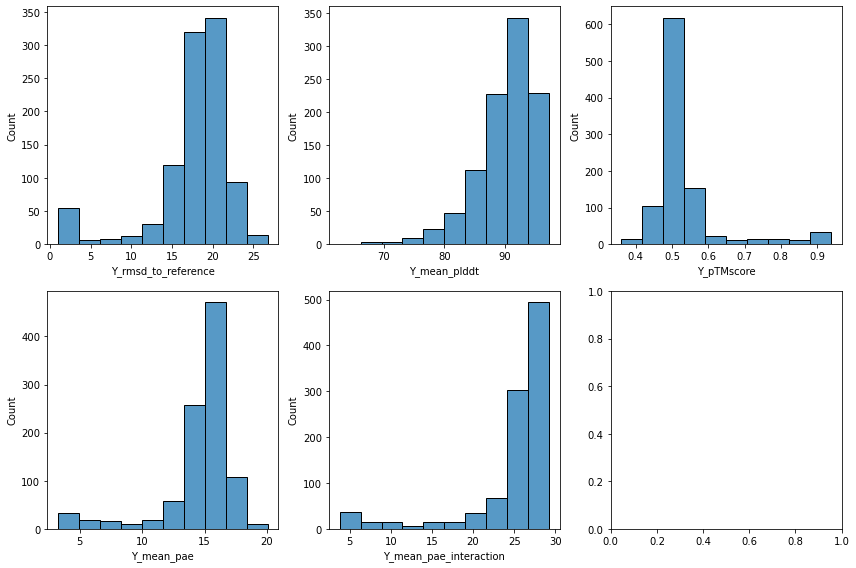

In [7]:
import matplotlib.pyplot as plt
from crispy_shifty.utils.plotting import histplot_df, pairplot_df

cols = [
    "Y_rmsd_to_reference",
    "Y_mean_plddt",
    "Y_pTMscore",
    "Y_mean_pae",
    "Y_mean_pae_interaction",
]
the_fig = histplot_df(
    df=sample_df,
    cols=cols,
    bins=10,
    # hue="designed_by",
)
# plt.savefig(os.path.join(output_path, "old_vs_new_af2_scores.png"))

<Figure size 1440x1440 with 0 Axes>

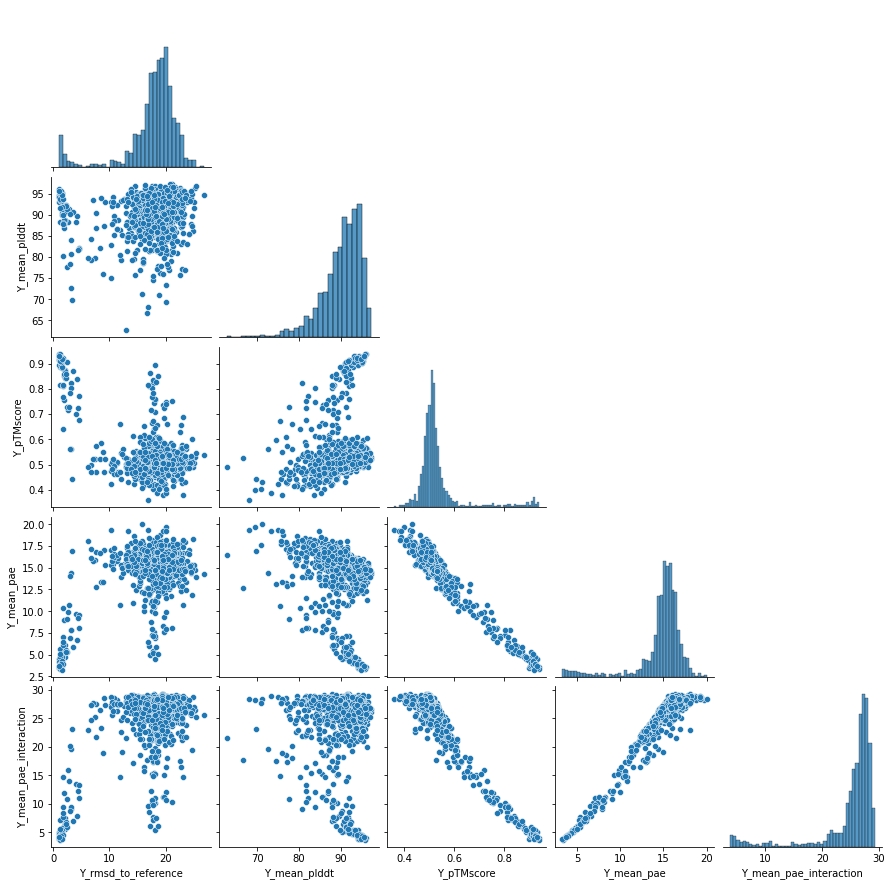

In [8]:
the_fig = pairplot_df(
    df=sample_df,
    cols=cols,
    # hue="designed_by",
)
# plt.savefig(os.path.join(output_path, "old_vs_new_af2_scores_paired.png"))

In [9]:
sample_df['msd_Y_beta'] = sample_df['mpnn_msd_betas'].str.split(',').str[1].astype(float)
sample_df[['mpnn_msd_betas', 'msd_Y_beta']]

,mpnn_msd_betas,msd_Y_beta
/pscratch/sd/b/broerman/05_fold_Y/decoys/0077/05_fold_Y_c6661990654b43f49bbc897255897ab7.pdb.bz2,"0.3,0.7",0.7
/pscratch/sd/b/broerman/05_fold_Y/decoys/0257/05_fold_Y_b6e1f159e65542ee8eecd221f0ab6d31.pdb.bz2,"0.4,0.6",0.6
/pscratch/sd/b/broerman/05_fold_Y/decoys/0413/05_fold_Y_7b9ec694403647cd8dea090425f2dd38.pdb.bz2,"0.3,0.7",0.7
/pscratch/sd/b/broerman/05_fold_Y/decoys/0458/05_fold_Y_ab14f1b79c814edc8eccaaa6b9b7a405.pdb.bz2,"0.4,0.6",0.6
/pscratch/sd/b/broerman/05_fold_Y/decoys/0341/05_fold_Y_1faecc87bf9d4eeba66c383738ed53f4.pdb.bz2,"0.3,0.7",0.7
...,...,...
/pscratch/sd/b/broerman/05_fold_Y/decoys/0281/05_fold_Y_69cb4aa22ec04f8e834c81a75ebf3d9b.pdb.bz2,"0.4,0.6",0.6
/pscratch/sd/b/broerman/05_fold_Y/decoys/0241/05_fold_Y_d94393016f244864804f65b0ac8325fd.pdb.bz2,"0.4,0.6",0.6
/pscratch/sd/b/broerman/05_fold_Y/decoys/0437/05_fold_Y_0767ecdebc4b415d8536fcaee80d8d02.pdb.bz2,"0.3,0.7",0.7
/pscratch/sd/b/broerman/05_fold_Y/decoys/0461/05_fold_Y_42f7d8db08514df8b786c5edc2c81f80.pdb.bz2,"0.4,0.6",0.6


### Plot effects of MPNN beta distribution on AF2 metrics

6it [00:00, 18.14it/s]


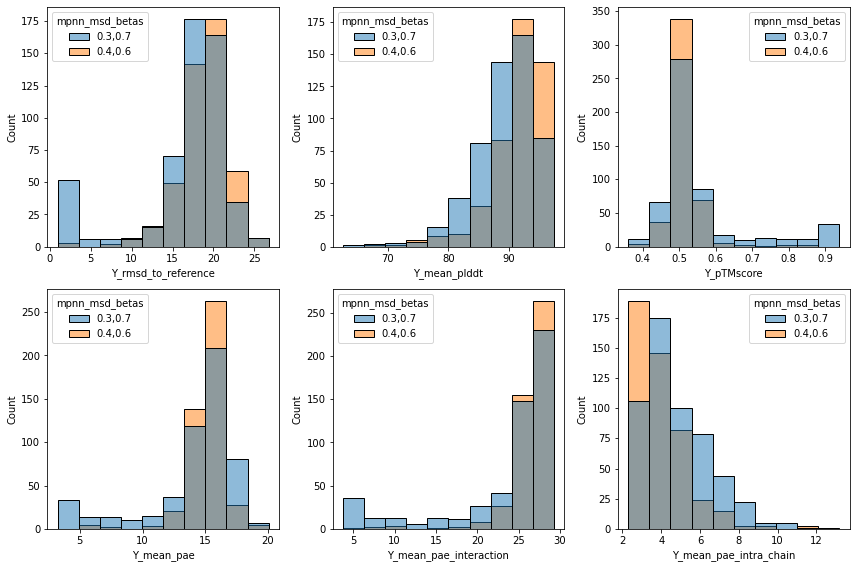

In [10]:
cols = [
    "Y_rmsd_to_reference",
    "Y_mean_plddt",
    "Y_pTMscore",
    "Y_mean_pae",
    "Y_mean_pae_interaction",
    "Y_mean_pae_intra_chain",
]
the_fig = histplot_df(
    df=mpnn,
    cols=cols,
    bins=10,
    hue="mpnn_msd_betas",
)
# plt.savefig(os.path.join(output_path, "old_vs_new_af2_scores_area.png"))

<Figure size 1440x1440 with 0 Axes>

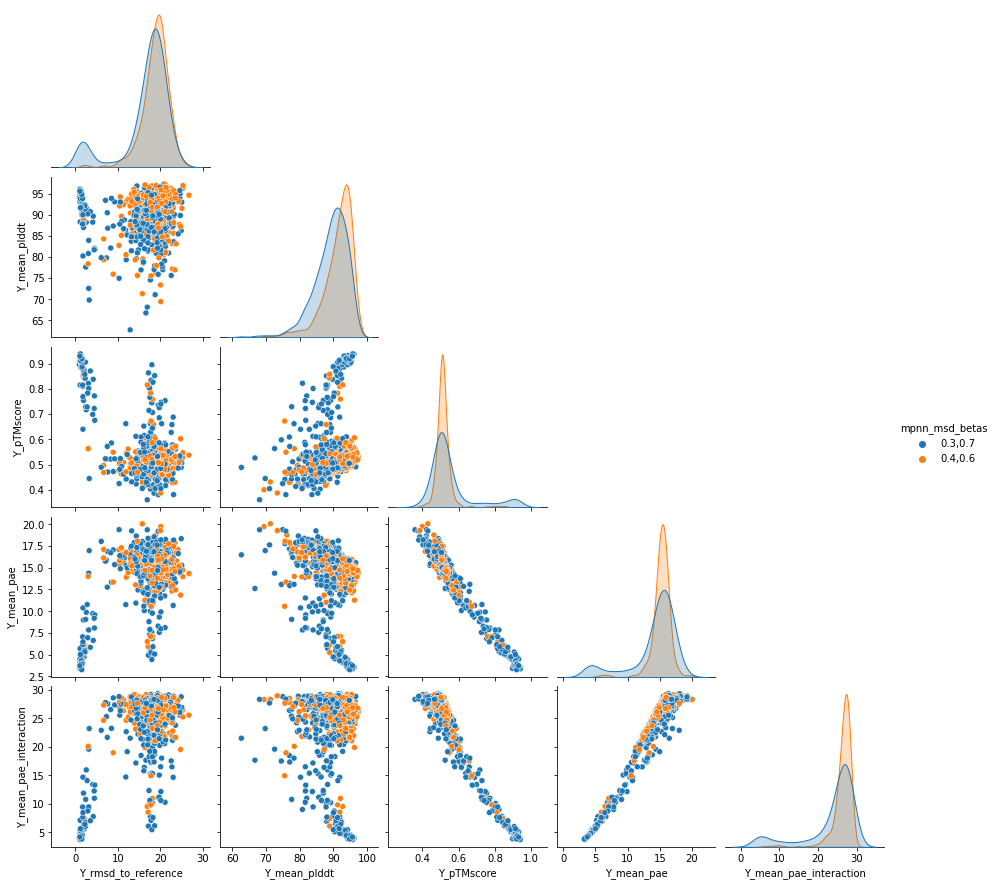

In [11]:
cols = [
    "Y_rmsd_to_reference",
    "Y_mean_plddt",
    "Y_pTMscore",
    "Y_mean_pae",
    "Y_mean_pae_interaction",
]
the_fig = pairplot_df(
    df=mpnn,
    cols=cols,
    hue="mpnn_msd_betas",
)
# plt.savefig(os.path.join(output_path, "old_vs_new_af2_scores_paired.png"))

In [7]:
# initial lenient filtering
filtered_df = scores_df.query("Y_rmsd_to_reference < 3 and Y_mean_plddt > 85 and Y_pTMscore > 0.7 and Y_mean_pae < 10 and Y_mean_pae_interaction < 10 and total_length_A < 288")

In [8]:
len(filtered_df)

18878

6it [00:00, 11.92it/s]


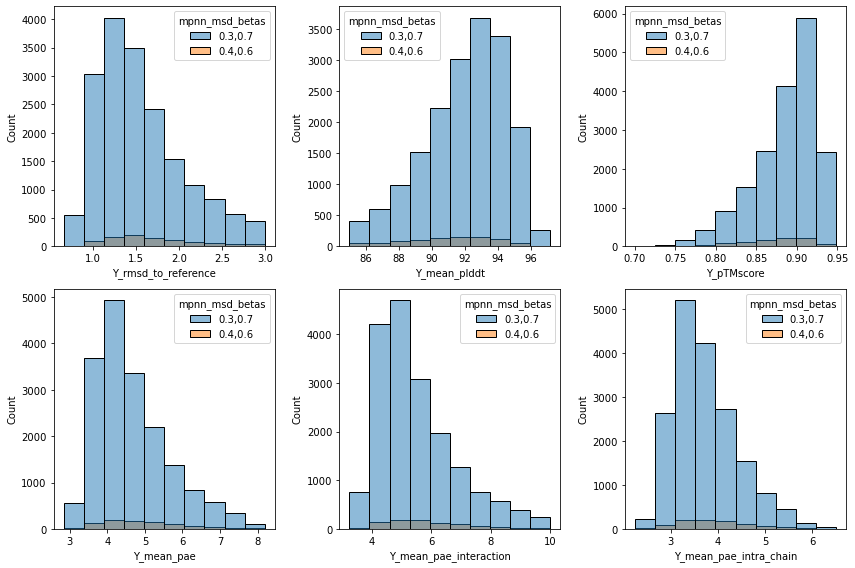

In [24]:
cols = [
    "Y_rmsd_to_reference",
    "Y_mean_plddt",
    "Y_pTMscore",
    "Y_mean_pae",
    "Y_mean_pae_interaction",
    "Y_mean_pae_intra_chain",
]
the_fig = histplot_df(
    df=filtered_df,
    cols=cols,
    bins=10,
    hue="mpnn_msd_betas",
)

In [9]:
if not os.path.exists(os.path.join(output_path, "scores_filtered.csv")):
    filtered_df.to_csv(os.path.join(output_path, "scores_filtered.csv"))

In [10]:
import pandas as pd
import os
simulation_name = "05_fold_Y"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/{simulation_name}"
filtered_df = pd.read_csv(os.path.join(output_path, "scores_filtered.csv"), index_col="Unnamed: 0")

from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
    # 'display.max_rows', None,
):
    display(filtered_df)

,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_pTMscore,Y_recycles,Y_rmsd_to_reference,Y_seed,Y_tol,Y_type,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,designed_by,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dslf_fa13,dssp_A,dssp_B,elapsed_time,fa_atr,fa_dun,fa_dun_dev,fa_dun_rot,fa_dun_semi,fa_elec,fa_intra_atr_xover4,fa_intra_elec,fa_intra_rep,fa_intra_rep_xover4,fa_intra_sol_xover4,fa_rep,fa_sol,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,hxl_tors,lk_ball,lk_ball_bridge,lk_ball_bridge_uncpl,lk_ball_iso,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,mpnn_msd_betas,mpnn_msd_design_area,mpnn_msd_temperature,new_loop_resis_A,new_loop_resis_B,omega,p_aa_pp,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,pro_close,rama_prepro,ref,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,shift_A,shift_B,ss_sc,total_length_A,total_length_B,total_score,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity,remodel_after_loop_B,remodel_before_loop_B,remodel_after_loop_A,remodel_before_loop_A,seq_A,seq_B
/pscratch/sd/b/broerman/05_fold_Y/decoys/0026/05_fold_Y_001af67eef6f450ba592f831b532fddb.pdb.bz2,4.850914,5.536115,5.522080,5.550150,4.118633,4.295110,3.942157,92.363724,3,0.879071,3.0,1.186635,0,0.287347,monomer_ptm,XAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAA...,XAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAAA...,758.125793,54.325855,54.604378,loop_remodel,loop_match,-1.0,336.196533,527.177490,898.941895,mpnn,20.0,55.0,17.0,0.0,LHHHHHHHHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHH...,LHHHHHHHHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHHH...,17.075603,-4973.449189,1385.948222,116.836300,294.782029,496.786307,-1594.352132,-147.913522,-99.169280,1511.770600,341.292812,149.496403,12905.211348,3384.917598,-23.522373,-30.509160,-35.928556,-696.566492,2.925725,1335.646138,4.842096,39.709601,3108.221138,-89.645824,9.897090,7.066299,0.745421,0.793773,"0.3,0.7",full,0.2,"101,102","101,102",152.061584,-272.485179,X26_3_20_2_ct1_fe,204.0,8.910085,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4.0,5.0,4.0,0.000000,-364.962657,119.37324,-1.0,0.814916,0.763066,0.760014,-1314.728149,-214.844894,-914.575989,-944.863770,-544.711670,-281.415161,-532.638672,-251.223541,-233.818466,-3.254277,-1.0,1.0,0.726427,204.0,204.0,4018.502696,0.182156,0.178475,0.174028,0.208154,0.886569,0.732256,0.119970,5.089826e-07,NaN,NaN,1.0,2.0,EKKEKAKELAEKAREIAEKVKEKAREMGDETAIRVAERLAEEAKRA...,EEKERAKRLAEEAIRIAKEVKRKAEERGDKEFIEIAEELEEAAKKA...
/pscratch/sd/b/broerman/05_fold_Y/decoys/0026/05_fold_Y_de693ef1827e4e44a37c2549921772c0.pdb.bz2,3.655164,4.149758,4.207602,4.091915,3.135099,3.154956,3.115241,94.438019,2,0.926453,3.0,1.019387,0,0.073054,monomer_ptm,XAAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAA...,XAAAAAAAAAAAAAAAAAAAAAAAAAAAGBAAAAAAAAAAAAAAAA...,152.276901,70.339119,70.339119,loop_match,loop_match,-1.0,594.001953,1018.254456,840.646851,mpnn,56.0,42.0,14.0,0.0,LHHHHHHHHHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHH...,LHHHHHHHHHHHHHHHHHHHHHHHHHHHLLHHHHHHHHHHHHHHHH...,21.624628,-5852.607309,1594.284009,86.756098,293.258765,486.055364,-1810.742299,-159.802309,-86.610078,1832.371716,144.635075,178.012105,9759.115253,3847.092488,-30.977749,-16.067158,-46.856326,-809.848709,51.558573,1481.534252,4.072744,30.808536,3471.031971,-81.861034,14.188929,13.505972,0.694458,0.740248,"0.3,0.7",full,0.2,"113,114,115,116","113,114,115,116",186.850368,-278.321762,DHR82,232.0,12.176095,/home/broerman/crispy_shifty/projects/crispy_s...,4.0,5.0,4.0,11.769643,-303.421674,241.82978,-1.0,0.742609,0.742775,0.783183,-1473.626953,-254.175217,-1062.065430,-1016.732300,-605.170837,-281.455078,-567.093140,-285.638062,-265.395752,-3.231638,1.0,-1.0,0.744422,232.0,232.0,1896.5672

In [11]:
# get unique sequences

unique_seqs = set()

for index, row in filtered_df.iterrows():
    full_seq = row["seq_A"] + "/" + row["seq_B"]
    filtered_df.loc[index, "full_seq"] = full_seq
    unique_seqs.add(full_seq)

unique_df = pd.DataFrame(columns=filtered_df.columns)
for unique_seq in unique_seqs:
    combo_df = filtered_df.query(f"full_seq == '{unique_seq}'")
    best_index = combo_df['Y_mean_plddt'].idxmax()
    unique_df.loc[best_index, :] = combo_df.loc[best_index]
    unique_df.loc[best_index, 'num_Y_models'] = len(combo_df)

print(filtered_df['full_seq'].nunique())
print(unique_df['full_seq'].nunique())
unique_df

8122
8122


,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_pTMscore,...,wnm_hlx,yhh_planarity,remodel_after_loop_B,remodel_before_loop_B,remodel_after_loop_A,remodel_before_loop_A,seq_A,seq_B,full_seq,num_Y_models
/pscratch/sd/b/broerman/05_fold_Y/decoys/0338/05_fold_Y_434b9b35f049416ab42eaaafe0683285.pdb.bz2,3.713982,4.285749,4.275698,4.295801,3.048676,3.145207,2.952144,93.490273,2,0.868002,...,0.129593,0.0,1.0,3.0,1.0,1.0,TLAEKVRRLARERGVSEEEAERLGRLARRSLLAAAGLYLALERGIS...,SLAERVRELALRQGASDEEAEELERLARENRLAAAVLLKMLEQGVS...,TLAEKVRRLARERGVSEEEAERLGRLARRSLLAAAGLYLALERGIS...,4.0
/pscratch/sd/b/broerman/05_fold_Y/decoys/0154/05_fold_Y_8a25b7eb77e748609cb07aaa74d85bd4.pdb.bz2,3.224439,3.752934,4.008405,3.497463,2.637146,2.886924,2.387368,95.739685,3,0.930224,...,0.102948,0.0,NaN,NaN,NaN,NaN,AAAEEVRRLAEELAERAERVGDERLARMARTLAELARRAADRGDRA...,EAAEEVRRLARELAEEARRVGDTELAERARELARRAAEAAERGLGA...,AAAEEVRRLAEELAERAERVGDERLARMARTLAELARRAADRGDRA...,2.0
/pscratch/sd/b/broerman/05_fold_Y/decoys/0148/05_fold_Y_fefd77eac3fb4c9081d7b42a8141c9ea.pdb.bz2,3.627349,4.182777,4.483127,3.882427,2.982456,3.39335,2.571563,94.185974,3,0.919209,...,0.110925,0.0,NaN,NaN,NaN,NaN,SEAELVRRRARELAERARERGDTRLAEAAERLAELAARAAEAGRAE...,AAAEEVRELARELARRARERGDRELAERAERLARRAEEAARRGREE...,SEAELVRRRARELAERARERGDTRLAEAAERLAELAARAAEAGRAE...,3.0
/pscratch/sd/b/broerman/05_fold_Y/decoys/0318/05_fold_Y_45bb925b05104699beae75e90c00c5ec.pdb.bz2,4.575377,5.4799,5.133787,5.826014,3.549016,3.196639,3.901394,91.630577,3,0.888935,...,0.138039,0.0,2.0,3.0,NaN,NaN,KMAKEAVKVAEEAAEAAKKRGDEALAKAAKALAKLAEALAKKGAVV...,SVVEEARRIAERAKELAKKRGDEELARRAERLGEMAERAAEEGRTA...,KMAKEAVKVAEEAAEAAKKRGDEALAKAAKALAKLAEALAKKGAVV...,5.0
/pscratch/sd/b/broerman/05_fold_Y/decoys/0169/05_fold_Y_fe10a03beb1b4dd0a34cd90bc6e7a813.pdb.bz2,5.238559,6.623631,7.203248,6.044013,3.747169,4.61921,2.875128,91.725845,1,0.827244,...,0.1191,0.0,2.0,3.0,1.0,1.0,AAAEEVRRLALRRGVAEAVADVLGEIARASRGAAAVLRLALERGVS...,GLAERVRELALARGASEEEAERLARIAAENERAGKVIYLLLRRGVS...,AAAEEVRRLALRRGVAEAVADVLGEIARASRGAAAVLRLALERGVS...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/pscratch/sd/b/broerman/05_fold_Y/decoys/0457/05_fold_Y_5f52d575dab04c4aae0f030050ee210f.pdb.bz2,4.188383,4.732818,5.062845,4.402791,3.606935,4.014345,3.199524,92.618629,3,0.91575,...,0.112548,0.000001,NaN,NaN,3.0,1.0,SAEERARRLVEEAERAARLAREAAERSGDERIQEAARILEELAERA...,KAKEEAKKLIERAKKAAEEAREAARRSGRAEIQELARELVRLNEEA...,SAEERARRLVEEAERAARLAREAAERSGDERIQEAARILEELAERA...,2.0
/pscratch/sd/b/broerman/05_fold_Y/decoys/0141/05_fold_Y_ae47dbd5421b4720b78c885898d1c97a.pdb.bz2,3.853275,4.538539,4.526751,4.550327,3.095299,2.999521,3.191078,93.242332,3,0.912687,...,0.128515,0.000001,2.0,3.0,NaN,NaN,AAARLAEEAAERARRLAEERGDEGLARLAEALAELARRLAERGDAV...,KAAEEAVRLAERARRLAERLGDEELAERARRLAELARRLAEEGREA...,AAARLAEEAAERARRLAEERGDEGLARLAEALAELARRLAERGDAV...,2.0
/pscratch/sd/b/broerman/05_fold_Y/decoys/0203/05_fold_Y_a9893a3624764d3a8925a95626973d8c.pdb.bz2,5.708103,6.969911,6.507255,7.432567,4.379703,3.089972,5.669432,89.996872,1,0.834764,...,0.135716,0.0,NaN,NaN,NaN,NaN,RVAEEAVRAAERARRLAERRGDRELAELAREMARLAREAAERGDEL...,AAAEEAIRLAEEAARLAERRGDRELAERARRMARLAAEAAREGREA...,RVAEEAVRAAERARRLAERRGDRELAELAREMARLAREAAERGDEL...,1.0
/pscratch/sd/b/broerman/05_fold_Y/decoys/0162/05_fold_Y_ebbc7ecbd0ee4bcf81925262581cb0bc.pdb.bz2,4.242492,4.807893,4.859122,4.756664,3.58357,3.59337,3.573769,92.506935,3,0.90428,...,0.092346,0.0,NaN,NaN,NaN,NaN,MARRVAEEAAEKAAEAARRARDRERRRRLERLAEVARIAARVVERR...,MARRRAEEAARRAREAARRAEDRERRELLEELARAAREAAEVVRAL...,MARRVAEEAAEKAAEAARRARDRERRRRLERLAEVARIAARVVERR...,2.0


In [12]:
if not os.path.exists(os.path.join(output_path, "scores_unique.csv")):
    unique_df.to_csv(os.path.join(output_path, "scores_unique.csv"))

In [10]:
with open(os.path.join(output_path, "folded_paired_states.list"), "w") as f:
    for path in unique_df.index:
        print(path, file=f)